In [1]:
import numpy as np 
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
    
from sklearn.svm import SVC 

# Train/Test Preparation

In [177]:
# Scraped yahoo data
options_data_3_11_df = pd.read_csv('../yahooData/results/finalData_11.csv', delimiter=',')

'''
NEEDS TO BE FIXED FOR finalData_11.csv
- I didn't use DaysToExpiration for the interim report because of some 58:00:xx value (not under 24:00:00)
'''
# add a new column for the difference of the date to expiration date
# options_data_3_11_df = options_data_3_11_df[options_data_3_11_df.Symbol != 'ORCL'] # oracle has record time problem, drop for now
# options_data_3_11_df['Record Time'] = pd.to_datetime(options_data_3_11_df['Record Time'])
# options_data_3_11_df['Expiration Date'] = pd.to_datetime(options_data_3_11_df['Expiration Date'])
# options_data_3_11_df['DaysToExpiration'] = options_data_3_11_df['Expiration Date'] - options_data_3_11_df['Record Time']
# options_data_3_11_df['DaysToExpiration'] = options_data_3_11_df['DaysToExpiration'].dt.days + 1

# Let's take a look at amzn calls and puts
amzn_options_data_3_11_df = options_data_3_11_df[options_data_3_11_df.Symbol=='AMZN']
amzn_options_data_3_11_df = amzn_options_data_3_11_df.replace({'In the Money': {'TRUE':1,'FALSE':0}})
amzn_options_data_3_11_df = amzn_options_data_3_11_df.replace({'Call': {True:1,False:0}})

# if we want to choose puts or calls only
is_call = False
amzn_options_data_3_11_df = amzn_options_data_3_11_df[amzn_options_data_3_11_df.Call==is_call]

# columns to drop for our input feature vector
# drop 'Call' if ignoring call/put, choosing calls, choosing puts
columns = ['Symbol','Expiration Date', 'Sector', 'Industry', 'Record Time', 'Profit', 'Call']
amzn_options_data_3_11_df = amzn_options_data_3_11_df.drop(columns=columns)

amzn_options_data_3_11_df

,Strike,Current Price,Implied Volatility,In the Money,Mark,Success
424,1850.0,2752.42,1.281254,0,0.020,1
425,1875.0,2752.42,1.234379,0,0.020,1
426,1900.0,2752.42,1.214848,0,0.025,1
427,1925.0,2752.42,1.171879,0,0.025,1
428,1950.0,2752.42,1.195317,0,0.050,1
...,...,...,...,...,...,...
42956,3750.0,2910.49,0.000010,1,821.575,0
42957,3880.0,2910.49,0.000010,1,952.775,0
42958,4050.0,2910.49,0.000010,1,1121.475,0
42959,4150.0,2910.49,0.000010,1,1222.000,0


In [178]:
# Scraped yahoo data
options_data_3_18_df = pd.read_csv('../yahooData/results/finalData_18.csv', delimiter=',')

'''
I didn't use DaysToExpiration for the interim report
'''
# add a new column for the difference of the date to expiration date
# options_data_3_18_df['Record Time'] = pd.to_datetime(options_data_3_18_df['Record Time'])
# options_data_3_18_df['Expiration Date'] = pd.to_datetime(options_data_3_18_df['Expiration Date'])
# options_data_3_18_df['DaysToExpiration'] = options_data_3_18_df['Expiration Date'] - options_data_3_18_df['Record Time']
# options_data_3_18_df['DaysToExpiration'] = options_data_3_18_df['DaysToExpiration'].dt.days + 1

# Let's take a look at amzn calls and puts
amzn_options_data_3_18_df = options_data_3_18_df[options_data_3_18_df.Symbol=='AMZN']
amzn_options_data_3_18_df = amzn_options_data_3_18_df.replace({'In the Money': {'True':1,'False':0}})
amzn_options_data_3_18_df = amzn_options_data_3_18_df.replace({'Call': {True:1,False:0}})

# if we want to choose puts or calls only
is_call = False
amzn_options_data_3_18_df = amzn_options_data_3_18_df[amzn_options_data_3_18_df.Call==is_call]

# columns to drop for our input feature vector
# drop 'Call' if ignoring call/put, choosing calls, choosing puts
columns = ['Symbol','Expiration Date', 'Sector', 'Industry', 'Record Time', 'Profit', 'Call']
amzn_options_data_3_18_df = amzn_options_data_3_18_df.drop(columns=columns)

amzn_options_data_3_18_df

,Strike,Current Price,Implied Volatility,In the Money,Mark,Success
537,1400.0,2752.42,1.203129,0,0.035,1
538,1450.0,2752.42,1.210941,0,0.075,1
539,1500.0,2752.42,1.138676,0,0.065,1
540,1520.0,2752.42,1.148442,0,0.095,1
541,1530.0,2752.42,1.183598,0,0.155,1
...,...,...,...,...,...,...
208426,5100.0,3225.01,4.253423,1,1872.500,0
208427,5200.0,3225.01,9.376469,1,2147.800,0
208428,5300.0,3225.01,8.001653,1,2173.475,0
208429,5400.0,3225.01,4.681645,1,2172.500,0


In [55]:
# 10590 rows × 5 columns
# X_train = amzn_options_data_3_18_df[amzn_options_data_3_18_df.DaysToExpiration <= 8]
# y_train = X_train[X_train.columns[-2]]
# X_train = X_train[X_train.columns.difference([' Success'], sort=False)]

# X_test = amzn_options_data_3_18_df[amzn_options_data_3_18_df.DaysToExpiration > 8]
# y_test = X_test[X_test.columns[-2]] # " Success" column
# X_test = X_test[X_test.columns.difference([' Success'], sort=False)]

# # "Success" col is actually " Success"
# print(X_train)
# print(y_train)

# print(X_test)
# print(y_test)

        Strike  Implied Volatility      Mark  DaysToExpiration
47760   1400.0            0.000010  1527.825                 8
47761   1500.0            0.000010  1430.025                 8
47762   1520.0            0.000010  1409.900                 8
47763   1540.0            0.000010  1388.200                 8
47764   1560.0            0.000010  1367.650                 8
...        ...                 ...       ...               ...
208426  5100.0            4.253423  1872.500                 0
208427  5200.0            9.376469  2147.800                 0
208428  5300.0            8.001653  2173.475                 0
208429  5400.0            4.681645  2172.500                 0
208430  5500.0            0.000010  2257.775                 0

[8272 rows x 4 columns]
47760     1
47761     1
47762     1
47763     1
47764     1
         ..
208426    0
208427    0
208428    0
208429    0
208430    0
Name:  Success, Length: 8272, dtype: int64
       Strike  Implied Volatility      Mark 

In [179]:
X_train = amzn_options_data_3_11_df
print(X_train.columns)
y_train = X_train[X_train.columns[-1]]
X_train = X_train.drop(columns=[' Success'])

# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

# scaled 3-11 data
X_train_scaled = scaler.transform(X_train)

# scale the 3-18 data based on the stats from 3-11 data
# sample ~1000 data points for 80/20 split
X_test = amzn_options_data_3_18_df.sample(frac=0.1)
print(X_test.columns)
y_test = X_test[X_test.columns[-1]]
X_test = X_test.drop(columns=[' Success'])
X_test_scaled = scaler.transform(X_test)

# # 80/20 train/test split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
print(X_train, y_train)
print(X_test, y_test)

Index(['Strike', 'Current Price', 'Implied Volatility', 'In the Money', 'Mark',
       ' Success'],
      dtype='object')
Index(['Strike', 'Current Price', 'Implied Volatility', 'In the Money', 'Mark',
       ' Success'],
      dtype='object')
       Strike  Current Price  Implied Volatility  In the Money      Mark
424    1850.0        2752.42            1.281254             0     0.020
425    1875.0        2752.42            1.234379             0     0.020
426    1900.0        2752.42            1.214848             0     0.025
427    1925.0        2752.42            1.171879             0     0.025
428    1950.0        2752.42            1.195317             0     0.050
...       ...            ...                 ...           ...       ...
42956  3750.0        2910.49            0.000010             1   821.575
42957  3880.0        2910.49            0.000010             1   952.775
42958  4050.0        2910.49            0.000010             1  1121.475
42959  4150.0        2910.

In [180]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

print(y_train.shape)
print(y_test.shape)

(2277, 5)
(560, 5)
(2277,)
(560,)


# Logistic Regression

In [181]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)
log_reg_model.score(X_test_scaled, y_test)
log_reg_model.coef_

array([[-6.2007463 , -1.52029342,  1.16504915, -1.98371526, -4.20594328]])

# Support Vector Machine (SVM)

In [172]:
SVM_model = SVC(gamma='auto')
SVM_model.fit(X_train_scaled, y_train)
SVM_model.score(X_test_scaled, y_test)

0.6808309726156752

LR
- ignoring call/put: 0.6978281397544853
- considering call/put: 0.7346553352219075
- calls: 0.6072144288577155
- puts: 0.8232142857142857
  - array([[-6.2007463 , -1.52029342,  1.16504915, -1.98371526, -4.20594328]])
  - in order: strike, mark, in the money, current price, implied volatility

SVM
- ignoring call/put: 0.6572237960339944
- considering call/put: 0.6808309726156752
- calls: 0.6112224448897795
- puts: 0.7285714285714285

<AxesSubplot:>

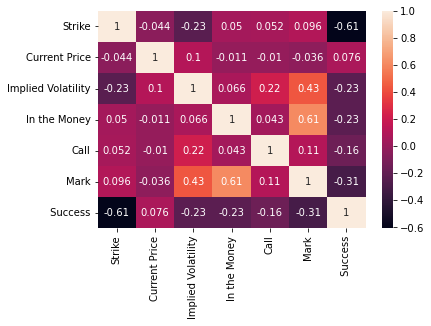

In [117]:
import seaborn as sns   
sns.heatmap(amzn_options_data_3_18_df.corr(),annot= True)

# This was done only on 3-18 data, probably ignore

**classification --> will our option be profitable-- yes or no?** \
seems pretty high...but our options are also priced 9 days out for now, so maybe thats why?

with just: Strike  Current Price  Implied Volatility  Call   Success  DaysToExpiration  
- acc: 0.9480642115203022
- adding in the mark boosts this to: 0.9905571293673276
- adding "in the money" decreases to: 0.9768649669499528
    
with just: Strike  Current Price  In the Money  Call   Success  DaysToExpiration
- acc: 0.8319169027384324
- from there add 'Implied Volatility': 0.9768649669499528
    
log_reg_model.coef_
- array([[-17.8157179 ,  -0.43907748,  -3.35907594,  -0.53774606, 0.05101503,  -7.44636698,  -0.42466597]])
- what is important: strike, implied volatility, mark

strike, implied volatility, mark
0.9910292728989613

strike, implied volatility
0.9362606232294618

implied volatility, mark
0.6350330500472143

strike, mark
1.0

ONLY implied volatility 
0.6180358829084042

ONLY mark
0.6274787535410765

ONLY strike
0.8550519357884797

with just: Strike  Current Price  Implied Volatility  Call   Success  DaysToExpiration  
- acc: 0.9853635505193579
- adding in the mark boosts this to: 0.9891406987724268
- adding "in the money" decreases to: 0.9858356940509915
    
with just: Strike  Current Price  In the Money  Call   Success  DaysToExpiration
- acc: 0.8937677053824362
- from there add 'Implied Volatility': 0.9858356940509915

strike, implied volatility, mark
0.9943342776203966

strike, implied volatility
0.9551463644948064

implied volatility, mark
0.7214353163361662

strike, mark
0.9886685552407932

ONLY implied volatility
0.6558073654390935

ONLY mark
0.6968838526912181

ONLY strike
0.8654390934844193

# Conclusions?

- strike price alone does pretty well (this is the MOST important) --> duh
- strike + mark = basically 100% 
- strike + mark + implied volatility actually does a little worse than just strike + mark (sometimes)
  - generally, strike + mark + implied volatility seems to do pretty well
- doesnt matter if its a call or put --> no difference in performance (pretty interesting)